<a href="https://colab.research.google.com/github/TurkuNLP/Dependency-parsing-and-data-analysis/blob/master/tnpp_diaparse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Turku Neural Parser Pipeline

* A mini-tutorial of the latest version of the parser pipeline
* Make sure to run it with GPU enabled (Runtime -> Change runtime type -> GPU)


# Modules

## Segmentation

* Tokenization and sentence segmentation happens jointly, and is implemented using the UDPipe library
* Machine-learned sequence classification model

## PoS and morphological tagging

* A BERT-based classification model
* Joint prediction of PoS and Tags
* Implemented in Pytorch Lightning

## Dependency parsing

* Parsing is done using the [diaparser](https://github.com/Unipisa/diaparser) parser
* A BERT-based model, implemented in Torch

## Lemmatization

* Lemmatization is a sequence-to-sequence model
* Wordform + Tags -> Lemma
* Fully machine-learned
* Implemented using OpenNMT (a machine translation library)

## GPU

* Current accuracy far beyond previous versions of this pipeline
* Cost: computationally intense deep neural network models
* Small tests and examples can run on CPU, but any non-trivial amount of text needs a GPU accelerator

## The FinBERT model

* Large-scale pre-trained language model of Finnish
* https://github.com/TurkuNLP/FinBERT
* Subword tokenization:

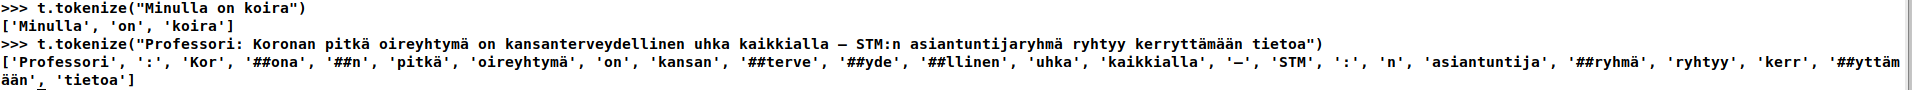

# INSTALL

* git clone the code
* cd to the directory
* and install all requirements
* this does take its time, the parser leans on quite large libraries

In [1]:
!git clone https://github.com/TurkuNLP/Turku-neural-parser-pipeline.git
%cd Turku-neural-parser-pipeline

Cloning into 'Turku-neural-parser-pipeline'...
remote: Enumerating objects: 1160, done.
remote: Counting objects: 100% (201/201), done.
remote: Compressing objects: 100% (159/159), done.
remote: Total 1160 (delta 113), reused 94 (delta 42), pack-reused 959
Receiving objects: 100% (1160/1160), 340.63 KiB | 3.83 MiB/s, done.
Resolving deltas: 100% (671/671), done.
/content/Turku-neural-parser-pipeline


In [2]:
#I like to upgrade these first
!python3 -m pip install --upgrade pip
!python3 -m pip install --upgrade setuptools

     |████████████████████████████████| 1.6 MB 11.9 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [3]:
!python3 -m pip install -r requirements.txt

     |████████████████████████████████| 304 kB 13.5 MB/s 
     |████████████████████████████████| 2.6 MB 49.3 MB/s 
     |████████████████████████████████| 212 kB 45.6 MB/s 
     |████████████████████████████████| 69 kB 7.4 MB/s 
     |████████████████████████████████| 918 kB 42.6 MB/s 
     |████████████████████████████████| 272 kB 55.6 MB/s 
     |████████████████████████████████| 22.3 MB 1.5 MB/s 
     |████████████████████████████████| 636 kB 41.9 MB/s 
     |████████████████████████████████| 895 kB 44.5 MB/s 
     |████████████████████████████████| 3.3 MB 45.5 MB/s 
     |████████████████████████████████| 73 kB 1.8 MB/s 
     |████████████████████████████████| 94 kB 3.2 MB/s 
     |████████████████████████████████| 212 kB 48.6 MB/s 
     |████████████████████████████████| 209 kB 52.0 MB/s 
     |████████████████████████████████| 207 kB 52.9 MB/s 
     |████████████████████████████████| 206 kB 56.0 MB/s 
     |████████████████████████████████| 195 kB 50.9 MB/s 
     |██████████████

In [4]:
#this is something we need to do for now, hopefully it eases when
#the next version of OpenNMT comes out
!python3 -m pip install --no-deps OpenNMT-py==2.1.2 

  Using cached OpenNMT_py-2.1.2-py3-none-any.whl (212 kB)
  Attempting uninstall: OpenNMT-py
    Found existing installation: OpenNMT-py 1.2.0
    Uninstalling OpenNMT-py-1.2.0:
      Successfully uninstalled OpenNMT-py-1.2.0


# FETCH MODEL

* At present, only the Finnish (fi_tdt_dia) and English (en_ewt_dia) models are available for the most recent diaparser-based version of the pipeline
* Models documented here: http://turkunlp.org/Turku-neural-parser-pipeline/models.html
* ...the remainder of UD languages is in the works...

In [5]:
# ...this is what you would do normally
# ...but let us now use direct GDrive links to play it safe
#!python3 fetch_models.py fi_tdt_dia

In [7]:
#Direct download
from google_drive_downloader import GoogleDriveDownloader as gdd

#FINNISH
gdd.download_file_from_google_drive(file_id='1ZnXxoLchiENEMTwQgiFPbHwV698H3JVg',dest_path='./fi_tdt_dia.tgz')
!tar zxvf fi_tdt_dia.tgz

# ENGLISH
#gdd.download_file_from_google_drive(file_id='1TBtMjqnKzN4N_xaVACezbUJfjB9vEcie',dest_path='./en_ewd_dia.tgz')
#!tar zxvf en_ewd_dia.tgz

models_fi_tdt_dia/
models_fi_tdt_dia/Lemmatizer/
models_fi_tdt_dia/Lemmatizer/lemmatizer.pt
models_fi_tdt_dia/Lemmatizer/lemma_cache.tsv
models_fi_tdt_dia/Lemmatizer/big_lemma_cache.tsv
models_fi_tdt_dia/Tagger/
models_fi_tdt_dia/Tagger/label_encoders.pickle
models_fi_tdt_dia/Tagger/best.ckpt
models_fi_tdt_dia/Tokenizer/
models_fi_tdt_dia/Tokenizer/tokenizer.udpipe
models_fi_tdt_dia/pipelines.yaml~
models_fi_tdt_dia/Diaparser/
models_fi_tdt_dia/Diaparser/diaparser.model
models_fi_tdt_dia/pipelines.yaml


* Note: this might take a while, the model is quite large (>1GB)
* The above command created the directory `models_fi_tdt_dia` with the model
* The file `models_fi_tdt_dia/pipelines.yaml` defines all the possible pipelines for the parser in this model
* The `parse_plaintext` is the correct choice in most situations

# PARSE IN PYTHON

* You need to load and start the pipeline of choice
* Like so:

In [8]:
from tnparser.pipeline import read_pipelines, Pipeline

# What pipelines do we have for the Finnish model?
available_pipelines=read_pipelines("models_fi_tdt_dia/pipelines.yaml")               # {pipeline_name -> its steps}
# This is a dictionary, its keys are the pipelines
print(list(available_pipelines.keys()))
# Instantiate one of the pipelines
p=Pipeline(available_pipelines["parse_plaintext"])    

['parse_plaintext', 'tag_plaintext', 'parse_sentlines', 'parse_wslines', 'parse_conllu', 'tokenize', 'parse_noisytext']


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/core/decorators.py:66: LightningDeprecationWarning: The `@auto_move_data` decorator is deprecated in v1.3 and will be removed in v1.5. Please use `trainer.predict` instead for inference. The decorator was applied to `predict`
  "The `@auto_move_data` decorator is deprecated in v1.3 and will be removed in v1.5."
INFO:root:Loading model from /content/Turku-neural-parser-pipeline/models_fi_tdt_dia/Tagger/best.ckpt


In [9]:
txt_in="Minulla on söpö koira. Se haukkuu, syö makkaraa, jahtaa oravia ja tsillailee kanssani!"
parsed=p.parse(txt_in)
print(parsed)

# newdoc
# newpar
# sent_id = 1
# text = Minulla on söpö koira.
1	Minulla	minä	PRON	_	Case=Ade|Number=Sing|Person=1|PronType=Prs	0	root	_	_
2	on	olla	AUX	_	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act	1	cop:own	_	_
3	söpö	söpö	ADJ	_	Case=Nom|Degree=Pos|Number=Sing	4	amod	_	_
4	koira	koira	NOUN	_	Case=Nom|Number=Sing	1	nsubj:cop	_	SpaceAfter=No
5	.	.	PUNCT	_	_	1	punct	_	_

# sent_id = 2
# text = Se haukkuu, syö makkaraa, jahtaa oravia ja tsillailee kanssani!
1	Se	se	PRON	_	Case=Nom|Number=Sing|PronType=Dem	2	nsubj	_	_
2	haukkuu	haukkua	VERB	_	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act	0	root	_	SpaceAfter=No
3	,	,	PUNCT	_	_	4	punct	_	_
4	syö	syödä	VERB	_	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act	2	conj	_	_
5	makkaraa	makkara	NOUN	_	Case=Par|Number=Sing	4	obj	_	SpaceAfter=No
6	,	,	PUNCT	_	_	7	punct	_	_
7	jahtaa	jahtaa	VERB	_	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act	2	conj	_	_
8	oravia	orava	NOUN	_	Case=Pa

# Parsing more data

* You might have many files with data you need to parse
* If you have massive documents, it makes sense to split them into manageable pieces
* Here is a basic example of how to achieve that
* You can download an example zip file I prepared from here: [http://bionlp-www.utu.fi/.ginter/news_test_data.zip](http://bionlp-www.utu.fi/.ginter/news_test_data.zip)
* Or simply upload your own


In [10]:
#Remember this notebook uses Turku-neural-parser-pipeline as its working directory
!wget http://bionlp-www.utu.fi/.ginter/news_test_data.zip
!unzip news_test_data.zip #will unzip some 60 files into ./test_data

--2021-08-25 08:56:15--  http://bionlp-www.utu.fi/.ginter/news_test_data.zip
Resolving bionlp-www.utu.fi (bionlp-www.utu.fi)... 130.232.253.44
Connecting to bionlp-www.utu.fi (bionlp-www.utu.fi)|130.232.253.44|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 136098 (133K) [application/zip]
Saving to: ‘news_test_data.zip’

news_test_data.zip  100%[===================>] 132.91K   603KB/s    in 0.2s    

2021-08-25 08:56:15 (603 KB/s) - ‘news_test_data.zip’ saved [136098/136098]

Archive:  news_test_data.zip
   creating: test_data/
  inflating: test_data/yle_news_0061.txt  
  inflating: test_data/yle_news_0053.txt  
  inflating: test_data/yle_news_0052.txt  
  inflating: test_data/yle_news_0050.txt  
  inflating: test_data/yle_news_0017.txt  
  inflating: test_data/yle_news_0044.txt  
  inflating: test_data/yle_news_0001.txt  
  inflating: test_data/yle_news_0005.txt  
  inflating: test_data/yle_news_0009.txt  
  inflating: test_data/yle_news_0051.txt  
  inflating

* Now we have 67 text files in `test_data` and we would like to parse them

In [ ]:
import glob #allows listing files
import tqdm #progress bar

all_files=glob.glob("test_data/*.txt") #list all files we need

for file_name in tqdm.tqdm(all_files):
    txt=open(file_name).read() #read the file
    parsed=p.parse(txt) #parse it
    with open(file_name.replace(".txt",".conllu"),"wt") as f_out: #open output file
        f_out.write(parsed) #and write out the result

* there are now parsed conllu files under `test_data` 

In [ ]:
# Basic stats of the parsed files
!echo "Sentences:" ; cat test_data/*.conllu | grep -Pc '^1\t'
!echo "Tokens:" ; cat test_data/*.conllu | grep -Pc '^[0-9]+\t'

* Now we yet need to pack and download the data

In [ ]:
!zip parsed.zip test_data/*.conllu

...and download the `parsed.zip` file and you're good to go

# Models

* Universal Dependencies models
* A handful of specialized models (e.g. biomedical English)
* Training new models not particularly difficult, documentation for the diaparser-based pipeline training in the works

# Failure modes

* Generally this is a pretty stable parser, it was used to parse some hundreds of millions of sentences successfully
* Most failures stem from the bleeding-edge libraries we are forced to use; these keep changing rapidly
* Backward-incompatible, breaking changes are very common
* Google Colab environment regularly upgraded to newest versions of many common libraries, and this might break some dependencies

In case of failure:

* Runtime -> Factory reset runtime, try again
* Check that you are on a GPU runtime, large files might still take long to parse -> split your data into more manageable pieces
* Ping Filip Ginter or Jenna Kanerva with as good a description of the problem as possible


In [ ]:
!wget https://drive.google.com/u/0/open?id=1TBtMjqnKzN4N_xaVACezbUJfjB9vEcie

In [ ]:
!tar zxvf en_edt_dia.tgz